In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statistics import mean
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [16]:
columns = ['alpha25', 'target']

In [17]:
df = pd.read_excel("F:\Alabama_Internship\EEG\Deepesh Code\Datasets\Dataset_alpha_peak_power.xlsx")
df = df[columns]

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X = pd.DataFrame(X)
y = pd.DataFrame(y)

Participants_count = len(df.index)//2

LR_scores = []
XGB_scores = []
KNN_scores = []
SVM_scores = []
KSVM_scores = []
NB_scores = []
DTC_scores = []
RFC_scores = []
Model_scores_list = []

In [18]:
X.head()

,0
0,6.499376e-12
1,5.715785e-12
2,2.028155e-11
3,2.870774e-11
4,1.082855e-10


In [19]:
y.head()

,0
0,1
1,1
2,1
3,1
4,1


For Leave one out cross validation (LOOCV method), drop out the pre and post info related to one participant, train the model using the remaining data. Test the model using the info which was dropped during the training stage.

In [20]:
print(Participants_count)

20


In [21]:
for i in range(Participants_count):

    X_train = X.drop(labels = [i, i + Participants_count], axis=0)
    y_train = y.drop(labels = [i, i + Participants_count], axis=0)
    X_test = X.iloc[[i, i + Participants_count],:] 
    y_test = y.iloc[[i, i + Participants_count],:] 

    if(i==0):
        X_train.to_excel("X_dataframe.xlsx")
        y_train.to_excel("y_dataframe.xlsx")

    # Feature Scaling

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()

    # Dimensionality Reduction

    # PCA - Principle Component Analysis

    #pca = PCA(n_components = 0.95)
    #X_train = pca.fit_transform(X_train)
    #X_test = pca.transform(X_test)
    #explained_variance = pca.explained_variance_ratio_
    #print(explained_variance)

    # LDA - Linear Discriminant Analysis

    #lda = LDA(n_components = 1)
    #X_train = lda.fit_transform(X_train,y_train)
    #X_test = lda.transform(X_test)

    # ML Models Accuracy Computation

    LR_classifier = LogisticRegression(random_state = 0)
    LR_classifier.fit(X_train, y_train)
    LR_scores.append(LR_classifier.score(X_test,y_test))

    XGB_classifier = XGBClassifier()
    XGB_classifier.fit(X_train, y_train)
    XGB_scores.append(XGB_classifier.score(X_test,y_test))
    #plt.bar(range(len(XGB_classifier.feature_importances_)), XGB_classifier.feature_importances_)
    #plt.show()

    KNN_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
    KNN_classifier.fit(X_train, y_train)
    KNN_scores.append(KNN_classifier.score(X_test,y_test))

    SVM_classifier = SVC(kernel = 'linear', random_state = 0)
    SVM_classifier.fit(X_train, y_train)
    SVM_scores.append(SVM_classifier.score(X_test,y_test))

    KSVM_classifier = SVC(kernel = 'rbf', random_state = 0)
    KSVM_classifier.fit(X_train, y_train)
    KSVM_scores.append(KSVM_classifier.score(X_test,y_test))

    NB_classifier = GaussianNB()
    NB_classifier.fit(X_train, y_train)
    NB_scores.append(NB_classifier.score(X_test,y_test))

    DTC_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    DTC_classifier.fit(X_train, y_train)
    DTC_scores.append(DTC_classifier.score(X_test,y_test))

    RFC_classifier = RandomForestClassifier(random_state=0)
    RFC_classifier.fit(X_train, y_train)
    RFC_scores.append(RFC_classifier.score(X_test,y_test))

We print out the mean of the accuracies obtained through each of the ML models

In [22]:
model_str = ["Logistic Regression","XG Boost", "KNN", "SVM", "Kernel SVM", "Naive Bayes", "Decision Trees Classifier", "Random Forest Classifier"]

Model_scores_list.append(LR_scores)
Model_scores_list.append(XGB_scores)
Model_scores_list.append(KNN_scores)
Model_scores_list.append(SVM_scores)
Model_scores_list.append(KSVM_scores)
Model_scores_list.append(NB_scores)
Model_scores_list.append(DTC_scores)
Model_scores_list.append(RFC_scores)

for i in range(len(model_str)):

    print(model_str[i] + " Score : " + str(mean(Model_scores_list[i])))

Logistic Regression Score : 0.6
XG Boost Score : 0.575
KNN Score : 0.575
SVM Score : 0.525
Kernel SVM Score : 0.475
Naive Bayes Score : 0.525
Decision Trees Classifier Score : 0.55
Random Forest Classifier Score : 0.55


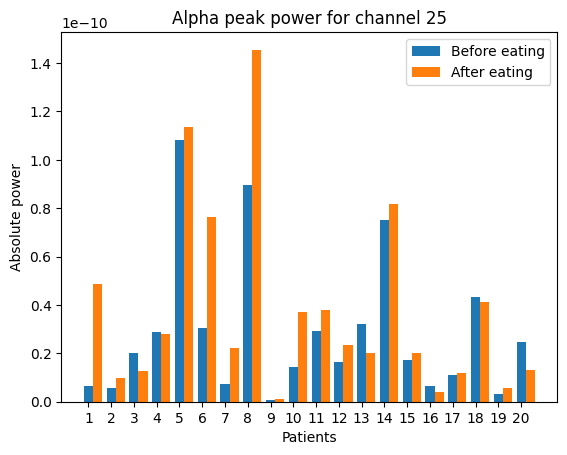

In [26]:
list = df['alpha25'].tolist()
before = list[:20]
after = list[20:]
patients = []

for i in range(20):
    patients.append(i + 1)

# plt.bar(patients, before, color ='maroon', width = 0.4)
# plt.bar(patients, after, color ='green', width = 0.4)
plt.bar(patients, before, width = 0.4, label='Before eating', align='center')
plt.bar([i + 0.4 for i in patients], after, width = 0.4, label='After eating', align='center')
plt.xlabel('Patients')
plt.ylabel('Absolute power')
plt.xticks(patients)
plt.legend()
plt.title('Alpha peak power for channel 25')
plt.show()